In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import emd
from scipy.signal import hilbert
import warnings

print("Hello world")



Hello world


In [5]:
try:
    data = pd.read_csv('./log_data.csv')
    depth = data['depth'].values
    gamma_log_signal = data['gamma'].values
    print(f"Data loaded successfully from 'gamma-log.csv'.")
    print(f"Depth range: {depth.min()} to {depth.max()}")
except Exception as e:
    print(f"An error occurred: {e}")
    print("File not found")



Data loaded successfully from 'gamma-log.csv'.
Depth range: 2700.0203 to 2920.0203


In [6]:
depth_diff = np.diff(depth)
if not np.allclose(depth_diff, depth_diff[0]):
    print("Warning: Depth intervals are not constant. Frequency calculation assumes variable intervals.")
    sampling_interval = depth_diff # Use individual intervals
else:
    sampling_interval = depth_diff[0] # Use constant interval
    print(f"Constant depth sampling interval: {sampling_interval:.4f}")

In [33]:
imfs = emd.sift.sift(gamma_log_signal)
print(imfs.shape)


(1320, 7)


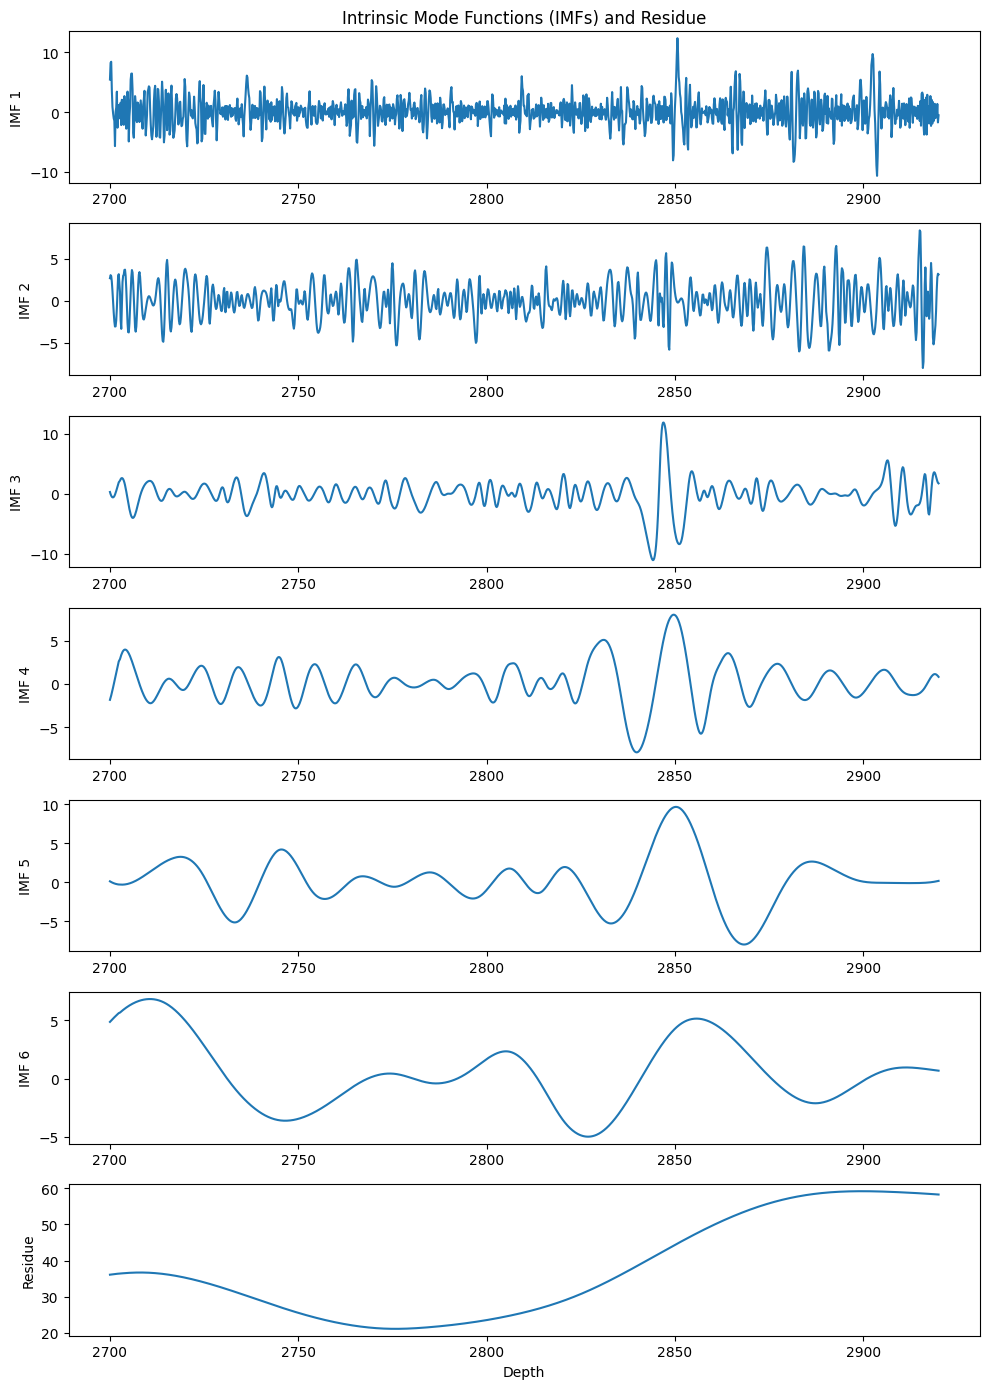

In [27]:
nIMFs = imfs.shape[1]  # number of IMFs (including residue)

plt.figure(figsize=(10, 2 * nIMFs))

for i in range(nIMFs):
    plt.subplot(nIMFs, 1, i + 1)
    plt.plot(depth, imfs[:, i])
    plt.ylabel(f'IMF {i + 1}' if i < nIMFs - 1 else 'Residue')
    if i == 0:
        plt.title("Intrinsic Mode Functions (IMFs) and Residue")
    if i == nIMFs - 1:
        plt.xlabel('Depth')

plt.tight_layout()
plt.show()

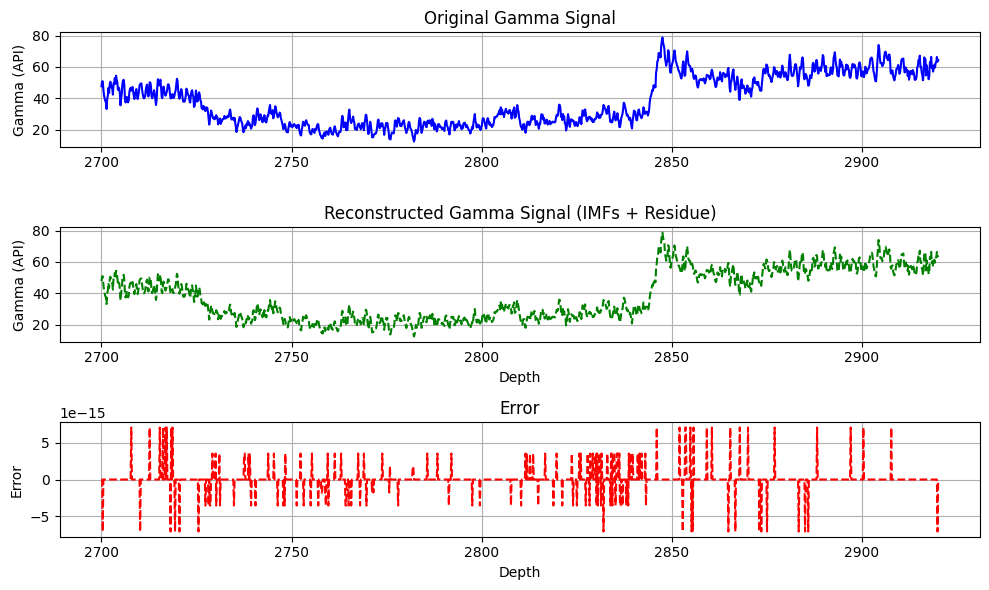

In [29]:
# Reconstruct the signal
reconstructedIMFs = np.sum(imfs[:, :-1], axis=1)
residue = imfs[:, -1]
reconstructedSignal = reconstructedIMFs + residue

error = gamma_log_signal - reconstructedSignal

# Create subplots
plt.figure(figsize=(10, 6))

# Plot original gamma
plt.subplot(3, 1, 1)
plt.plot(depth, gamma_log_signal, color='blue')
plt.title("Original Gamma Signal")
plt.ylabel("Gamma (API)")
plt.grid(True)

# Plot reconstructed signal
plt.subplot(3, 1, 2)
plt.plot(depth, reconstructedSignal, color='green', linestyle='--')
plt.title("Reconstructed Gamma Signal (IMFs + Residue)")
plt.xlabel("Depth")
plt.ylabel("Gamma (API)")
plt.grid(True)

# Plot error
plt.subplot(3, 1, 3)
plt.plot(depth, error, color='red', linestyle='--')
plt.title("Error")
plt.xlabel("Depth")
plt.ylabel("Error")
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()
